In [2]:
import yfinance as yf
import pandas as pd

# List of Nifty sector indices
sector_indices = ['^CNXAUTO', '^CNXENERGY', '^CNXIT', '^CNXMEDIA', '^CNXMETAL',  '^CNXREALTY']

sector_data = {}

# Fetching data for each sector index
for index in sector_indices:
    sector_data[index] = yf.download(index, start="2014-01-01", end="2024-01-01")

sector_df = pd.concat({k: v['Close'] for k, v in sector_data.items()}, axis=1)
sector_df.columns = [col.replace('^', '') for col in sector_df.columns]  # Clean column names



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
import wbdata
import datetime
import pandas as pd


start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2024, 1, 1)

# Fetching GDP data for India
gdp_data = wbdata.get_dataframe(indicators={"NY.GDP.MKTP.CD": "GDP"}, country="IN")
gdp_data.index = pd.to_datetime(gdp_data.index)

# Filtering the dates
gdp_data = gdp_data[(gdp_data.index >= start_date) & (gdp_data.index <= end_date)]

# Fetching inflation data for India
inflation_data = wbdata.get_dataframe(indicators={"FP.CPI.TOTL": "Inflation"}, country="IN")
inflation_data.index = pd.to_datetime(inflation_data.index)

# Filtering the dates
inflation_data = inflation_data[(inflation_data.index >= start_date) & (inflation_data.index <= end_date)]

# Combining macroeconomic data into a single DataFrame
macro_data = pd.concat([gdp_data, inflation_data], axis=1)


In [4]:
import numpy as np
# Checking for missing values and handling them
sector_df = sector_df.fillna(method='ffill').fillna(method='bfill')

# Normalizing the macroeconomic data
macro_data['GDP'] = macro_data['GDP'].apply(lambda x: np.log(x))
macro_data = (macro_data - macro_data.mean()) / macro_data.std()


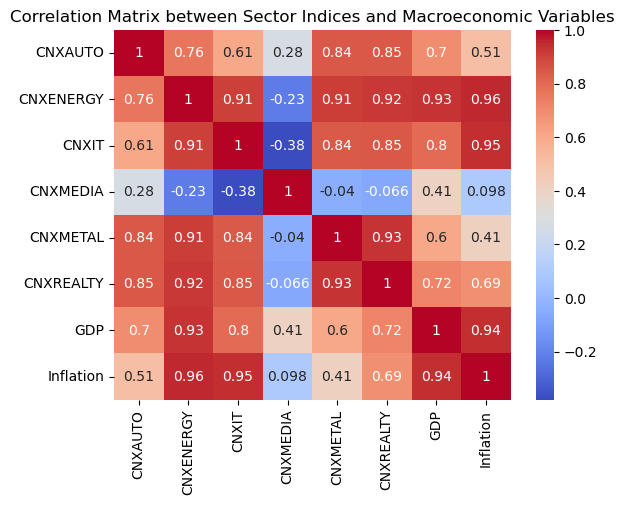

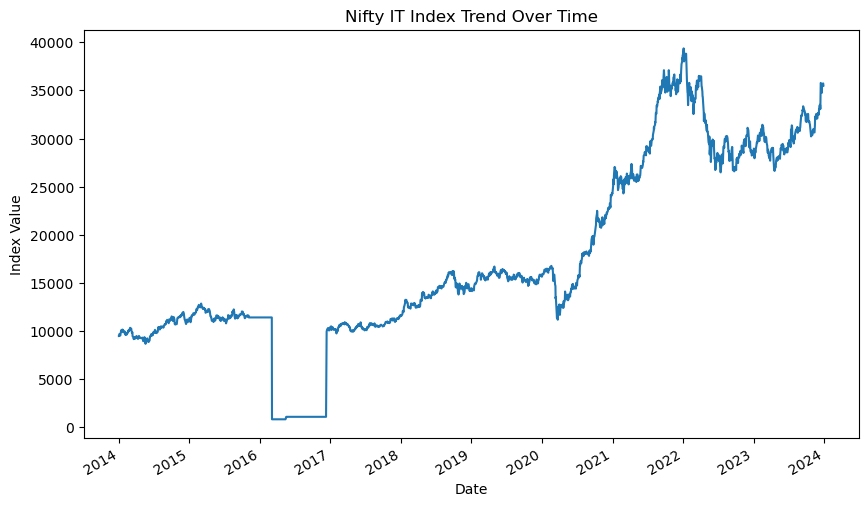

            CNXAUTO     CNXENERGY         CNXIT     CNXMEDIA     CNXMETAL  \
count   2459.000000   2459.000000   2459.000000  2459.000000  2459.000000   
mean    9769.341284  15504.701642  17434.188350  2243.836764  3628.461754   
std     2494.123806   6361.170267   9625.286680   537.894607  1550.648795   
min     4517.750000   7299.149902    830.000000   987.200012  1495.599976   
25%     8093.900146   9691.974609  11046.599609  1828.174988  2464.849976   
50%     9495.950195  14312.750000  14603.349609  2204.449951  3096.899902   
75%    11066.074707  19599.550781  27129.625000  2525.025024  5095.050049   
max    18618.199219  33721.398438  39370.699219  3642.699951  7978.000000   

         CNXREALTY  
count  2459.000000  
mean    297.185096  
std     121.893078  
min     128.250000  
25%     204.674995  
50%     266.149994  
75%     365.550003  
max     783.049988  


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation analysis
correlation_matrix = pd.concat([sector_df, macro_data], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix between Sector Indices and Macroeconomic Variables')
plt.show()

# Trend analysis for Nifty Bank Index
fig, ax = plt.subplots(figsize=(10, 6))
sector_df['CNXIT'].plot(ax=ax)
ax.set_title("Nifty IT Index Trend Over Time")
ax.set_xlabel('Date')
ax.set_ylabel('Index Value')
plt.show()

# Statistical summary
summary_stats = sector_df.describe()
print(summary_stats)


In [33]:

combined_data = sector_df.join(macro_data, how='inner')
print(combined_data)

train_data = combined_data.iloc[:-494]
test_data = combined_data.iloc[-494:]


                 CNXAUTO     CNXENERGY         CNXIT     CNXMEDIA  \
2014-01-01   5292.649902   7931.700195   9478.349609  1795.199951   
2015-01-01   8318.799805   8630.950195  11216.299805  2378.300049   
2016-01-01   8328.299805   8594.700195  11414.450195  2627.449951   
2018-01-01  11890.500000  14138.950195  11665.750000  3461.399902   
2019-01-01   9182.450195  14348.000000  14440.299805  2574.149902   
2020-01-01   8210.099609  15987.799805  15652.400391  1794.199951   

               CNXMETAL   CNXREALTY       GDP  Inflation  
2014-01-01  2493.800049  189.149994 -1.437626  -1.328593  
2015-01-01  2693.250000  203.050003 -1.258227  -1.010792  
2016-01-01  1830.300049  175.850006 -0.756744  -0.674594  
2018-01-01  3919.199951  347.700012  0.186806  -0.147071  
2019-01-01  3135.250000  237.500000  0.463023   0.138537  
2020-01-01  2796.050049  297.850006  0.119594   0.664680  


In [15]:
df=pd.read_csv('^CNXIT_10yrs.csv',index_col='Date',parse_dates=True)
print('Shape of data',df.shape)
df.head()

Shape of data (2168, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,6049.899902,6063.850098,6018.299805,6031.000000,6031.000000,0
2013-01-03,6045.350098,6111.350098,6034.950195,6097.600098,6097.600098,0
2013-01-04,6118.500000,6159.799805,6108.000000,6153.200195,6153.200195,0
2013-01-07,6159.350098,6190.549805,6141.200195,6175.450195,6175.450195,0
2013-01-08,6160.750000,6173.750000,6115.149902,6147.899902,6147.899902,0


In [16]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-Value: ",dftest[1])
    print("3. Num of Lags :",dftest[2])
    print("4. Num of Observations Used for ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key,":",val)
ad_test(df['Close'])


1. ADF:  -0.5974445691086057
2. P-Value:  0.8715584046713585
3. Num of Lags : 6
4. Num of Observations Used for ADF Regression and Critical Values Calculation : 2161
5. Critical Values :
	 1% : -3.4333796551178315
	 5% : -2.862878393267993
	 10% : -2.5674824941514


In [27]:
from statsmodels.tsa.arima.model import ARIMA
print(df.shape)
train=df.iloc[:-494]
test=df.iloc[-494:]
print(train.shape,test.shape)
model2=ARIMA(df['Close'],order=(5,1,1))
model2=model2.fit()
df.tail()


(2168, 6)
(1674, 6) (494, 6)


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,28442.800781,28603.599609,28179.550781,28237.050781,28237.050781,19000
2022-12-27,28551.750000,28685.000000,28333.800781,28636.250000,28636.250000,12800
2022-12-28,28495.750000,28715.300781,28346.250000,28583.449219,28583.449219,13400
2022-12-29,28408.300781,28724.750000,28386.650391,28687.199219,28687.199219,16200
2022-12-30,28887.800781,29027.000000,28564.750000,28621.699219,28621.699219,15500


In [28]:
start=len(train)
end=len(train)+len(test)-1
pred=model2.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2021-01-04    24200.493002
2021-01-05    25119.347750
2021-01-06    25811.711088
2021-01-07    25168.988460
2021-01-08    25072.402762
                  ...     
2022-12-23    28750.261007
2022-12-27    28175.880213
2022-12-28    28653.358794
2022-12-29    28733.588093
2022-12-30    28566.434981
Name: predicted_mean, Length: 494, dtype: float64


<AxesSubplot:xlabel='Date'>

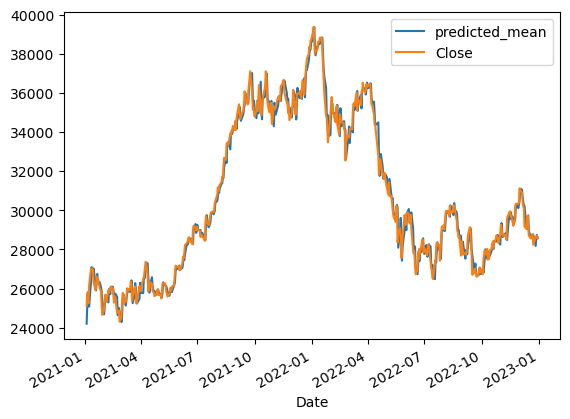

In [36]:
pred.plot(legend=True)
test['Close'].plot(legend=True)